# Figure 2g. Notebook

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np
import matplotlib

# Import Custom GTL plotting scheme
from genometechlab_plotting import setup_style
setup_style('inline')

Loaded 7 Helvetica fonts


## Read Data

In [2]:
# Define Filepaths
rna002_m6anet_path = '../Exemplar_Data/modkit/nbt_data_6.3.2_hac.pass.NoU.gencode_v43_sorted_filtered_m6anet_site_genome.aligned.chr2_112157000_114000000.tsv'
rna004_m6anet_path = '../Exemplar_Data/modkit/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.gencode_v43_sorted_filtered_m6anet_site_genome.aligned.chr2_112157000_114000000.tsv'
dorado_path = '../Exemplar_Data/modkit/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.GRCh38.sorted.calmd.filtered.chr2_112157000_114000000.modkit_0.7_threshold.fp_adjusted.tsv'

# Read in files and rename headers
def load_df(path, m6anet = False):
    if not m6anet:
        df = pd.read_csv(path, sep = '\t', header = None)
        df.rename(
            columns={
                0: 'Chromosome',
                1: 'Start',
                2: 'End',
                3: 'Call',
                4: 'Score',
                5: 'Strand',
                6: 'Start_1',
                7: 'End_1',
                8: 'RBG',
                9: 'N_valid_cov',
                10: 'Mod_Percent',
                11: 'N_mod',
                12: 'N_canon',
                13: 'N_other_mod',
                14: 'N_delete',
                15: 'N_fail',
                16: 'N_diff',
                17: 'N_no_call',
                18: 'Adjusted_Mod_Proportion'
            },
            inplace = True
        )
    else:
        df = pd.read_csv(path, sep = '\t')

    return df

rna002_m6anet = load_df(rna002_m6anet_path, m6anet = True)
rna004_m6anet = load_df(rna004_m6anet_path, m6anet = True)
dorado = load_df(dorado_path)


## Filter Dataframes for "Valid" or confident modifications

In [3]:
# Extra filtering for Venn Diagram
rna002_m6anet_filtered = rna002_m6anet[(rna002_m6anet['mod_percent'] >= 20) & (rna002_m6anet['probability_modified'] > 0.90)]
rna004_m6anet_filtered = rna004_m6anet[(rna004_m6anet['mod_percent'] >= 20) & (rna004_m6anet['probability_modified'] > 0.90)]
dorado_filtered = dorado[(dorado['Mod_Percent'] >= 20)]

# Setup sets for easy matplotlib venn3 plotting
rna002 = [tuple(x[1].to_list()) for x in rna002_m6anet_filtered[["chrom", "end", "base", "strand"]].iterrows()]
rna004 = [tuple(x[1].to_list()) for x in rna004_m6anet_filtered[["chrom", "end", "base", "strand"]].iterrows()]
dorado = [tuple(x[1].to_list()) for x in dorado_filtered[["Chromosome", "End", "Call", "Strand"]].iterrows()]
set_dorado = set(dorado)
set_rna002 = set(rna002)
set_rna004 = set(rna004)

## Plotting

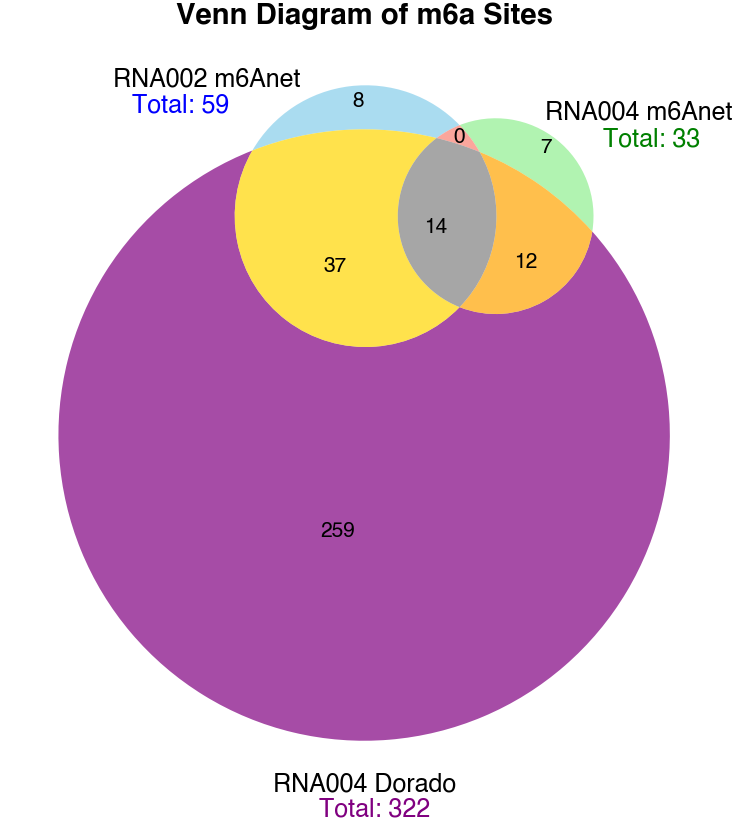

In [4]:
%matplotlib inline

plt.figure(facecolor='white')
venn = venn3( [set_rna002, set_rna004, set_dorado],
    set_labels=(
        "RNA002 m6Anet",
        "RNA004 m6Anet",
        "RNA004 Dorado"
    )
)

for patch, color in zip(venn.patches, ['skyblue', 'lightgreen', 'salmon', 'purple', 'gold', 'orange', 'gray']):
    if patch:
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
plt.text(-0.35, 0.495, f"Total: {len(set_rna002)}", fontsize=12, color='blue', ha='center')
plt.text(0.5, 0.435, f"Total: {len(set_rna004)}", fontsize=12, color='green', ha='center')
plt.text(0.0, -0.775, f"Total: {len(set_dorado)}", fontsize=12, color='purple', ha='center')
plt.title('Venn Diagram of Overlapping Positions', fontsize=16)
plt.title("Venn Diagram of m6a Sites")
plt.show()
